# Project Overview

In this project, I will explore a dataset on westbound traffic on the I-94 Interstate highway. I’ll analyze traffic volume data recorded by a station midway between Minneapolis and Saint Paul.

Using my data analysis skills I will determine key indicators of heavy traffic on I-94, which could include weather type, time of day, or day of the week. I will achieve this by examining traffic volume patterns across various conditions. The station only records westbound traffic (cars moving from east to west),meaning our analysis will be based on westbound traffic of that station

In [1]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              48204 non-null  object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In this case  we are lucky to have a dataset with no row containing null values. This will make our data cleaning project easier

In [4]:
# lets search for duplicates
df[df['date_time'].duplicated(keep=False)]
#print("Rows with duplicate date_time values:")
#print(duplicates)


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
178,6793,None,281.25,0.0,0.0,99,Rain,light rain,10-10-2012 07:00
179,6793,None,281.25,0.0,0.0,99,Drizzle,light intensity drizzle,10-10-2012 07:00
180,6283,None,280.10,0.0,0.0,99,Rain,light rain,10-10-2012 08:00
181,6283,None,280.10,0.0,0.0,99,Drizzle,light intensity drizzle,10-10-2012 08:00
182,5680,None,279.61,0.0,0.0,99,Rain,light rain,10-10-2012 09:00
...,...,...,...,...,...,...,...,...,...
48173,3818,None,280.68,0.0,0.0,90,Clouds,overcast clouds,29-09-2018 19:00
48192,4380,None,283.48,0.0,0.0,90,Rain,light rain,30-09-2018 14:00
48193,4380,None,283.48,0.0,0.0,90,Drizzle,light intensity drizzle,30-09-2018 14:00
48194,4302,None,283.84,0.0,0.0,75,Rain,proximity shower rain,30-09-2018 15:00


<br>
Here we have a lot of duplicate rows in the date_time column which is the column we expect to have uniques observations. However, looking keenly we can see the rest of the columns do not have identical values.This represents varying weather data in the same hour.
So we retain the rows. Next we will perform Explatory Data Analysis and perform further cleaning from the results if necessary

# EDA

In [5]:
df.columns

Index(['traffic_volume', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

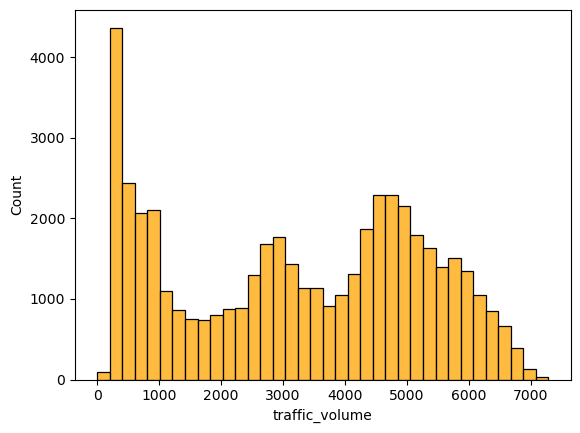

In [6]:
# plotting a histogram to have a look at the ditribution of the traffic volume

sns.histplot(data = df,x = 'traffic_volume',color = 'orange')

plt.show()

In [7]:
df[df['traffic_volume'] == df['traffic_volume'].max()]

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
31615,7280,None,270.75,0.0,0.0,90,Clouds,overcast clouds,09-03-2017 16:00


In [8]:
df[df['traffic_volume'] == df['traffic_volume'].min()]

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
25186,0,None,296.68,0.0,0.0,40,Rain,light rain,23-07-2016 18:00
25191,0,None,295.90,0.0,0.0,90,Haze,haze,23-07-2016 23:00


In [9]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Most of the time we can see the traffic is between 0 - 1000. The highest traffic_volume exhibited was 7200 from 2012 to 2018 and ofcourse it wasn't on a holiday.

The minimum traffic volume observed was 0, occurring on multiple occasions in 2016, sometimes on the same day but at different times. The mean traffic volume is 3,260, and the high standard deviation of 1,986 indicates significant variability in traffic volume. This suggests that traffic volume is quite volatile, with some periods experiencing high traffic while others have very low or no traffic.

Interesting findings! Now I would like to check out if there is a difference in traffic between day and night time.

To do this, let me first convert the date_time column to a timestamp type

In [10]:
df['date_time'] = pd.to_datetime(df['date_time'],format = '%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       48204 non-null  int64         
 1   holiday              48204 non-null  object        
 2   temp                 48204 non-null  float64       
 3   rain_1h              48204 non-null  float64       
 4   snow_1h              48204 non-null  float64       
 5   clouds_all           48204 non-null  int64         
 6   weather_main         48204 non-null  object        
 7   weather_description  48204 non-null  object        
 8   date_time            48204 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [11]:
# Lets create a column showing day and night

df['time_of_day'] = df['date_time'].apply(lambda x: 'Day' if 6 <= x.hour < 18 else 'Night')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       48204 non-null  int64         
 1   holiday              48204 non-null  object        
 2   temp                 48204 non-null  float64       
 3   rain_1h              48204 non-null  float64       
 4   snow_1h              48204 non-null  float64       
 5   clouds_all           48204 non-null  int64         
 6   weather_main         48204 non-null  object        
 7   weather_description  48204 non-null  object        
 8   date_time            48204 non-null  datetime64[ns]
 9   time_of_day          48204 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 3.7+ MB


In [12]:
# Checking traffic_volume stats during the day

day_traffic_mean = df[df['time_of_day'] == 'Day']['traffic_volume'].mean()
day_traffic_mean

4749.223996997248

In [13]:
# Checking traffic stats during the night

night_traffic_mean = df[df['time_of_day'] == 'Night']['traffic_volume'].mean()
night_traffic_mean

1785.659663171799

In [14]:
df[df['time_of_day'] == 'Night']['traffic_volume'].describe()

count    24226.000000
mean      1785.659663
std       1332.692347
min          0.000000
25%        530.000000
50%       1414.000000
75%       2880.000000
max       5773.000000
Name: traffic_volume, dtype: float64

In [15]:
df[df['time_of_day'] == 'Day']['traffic_volume'].describe()

count    23978.000000
mean      4749.223997
std       1314.402414
min          1.000000
25%       4269.000000
50%       4923.000000
75%       5660.000000
max       7280.000000
Name: traffic_volume, dtype: float64

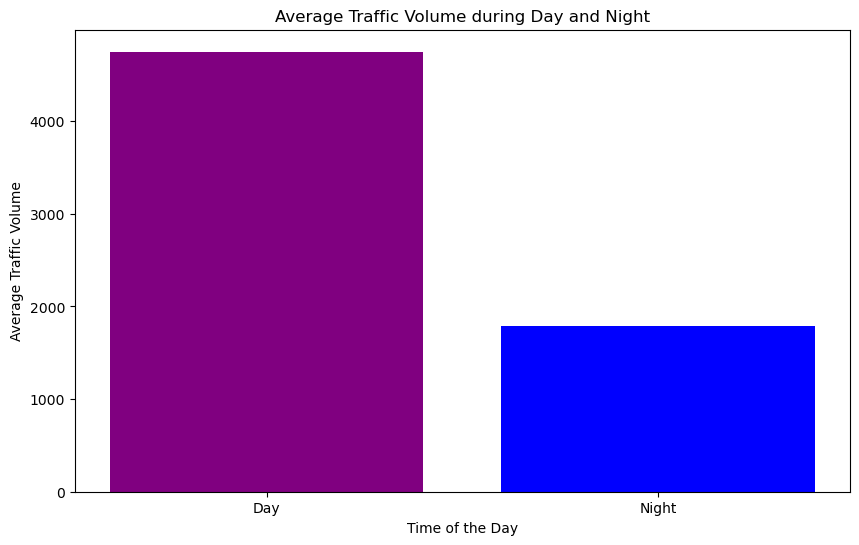

In [16]:
labels = ['Day','Night']
means = [day_traffic_mean,night_traffic_mean]

plt.figure(figsize = (10,6))
plt.bar(labels,means,color = ['purple','blue'])
plt.xlabel('Time of the Day')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume during Day and Night')
plt.show()

Significantly higher traffic volume is observed during the day compared to the night. The high standard deviation relative to the mean indicates that traffic volume is more volatile at night, with larger fluctuations in volume than during the day.

<br>
Let's also have a peek on the different day effects on traffic_volume. First I'll need to create a new column represents the different days

In [17]:
df['Days'] = df['date_time'].apply(lambda x : x.day_name())
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,time_of_day,Days
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,Day,Tuesday
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,Day,Tuesday
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,Day,Tuesday
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,Day,Tuesday
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,Day,Tuesday


In [18]:
# grouping traffic_volume according to days

Days_traffic_total = df.groupby('Days')['traffic_volume'].sum()

Days_traffic_mean = df.groupby('Days')['traffic_volume'].mean()

In [19]:
Days_traffic_total

Days
Friday       24994869
Monday       23403986
Saturday     18946722
Sunday       16276939
Thursday     24799562
Tuesday      23882653
Wednesday    24831553
Name: traffic_volume, dtype: int64

In [20]:
Days_traffic_mean

Days
Friday       3656.358836
Monday       3309.387161
Saturday     2773.638120
Sunday       2368.588329
Thursday     3637.899663
Tuesday      3488.555799
Wednesday    3583.196681
Name: traffic_volume, dtype: float64

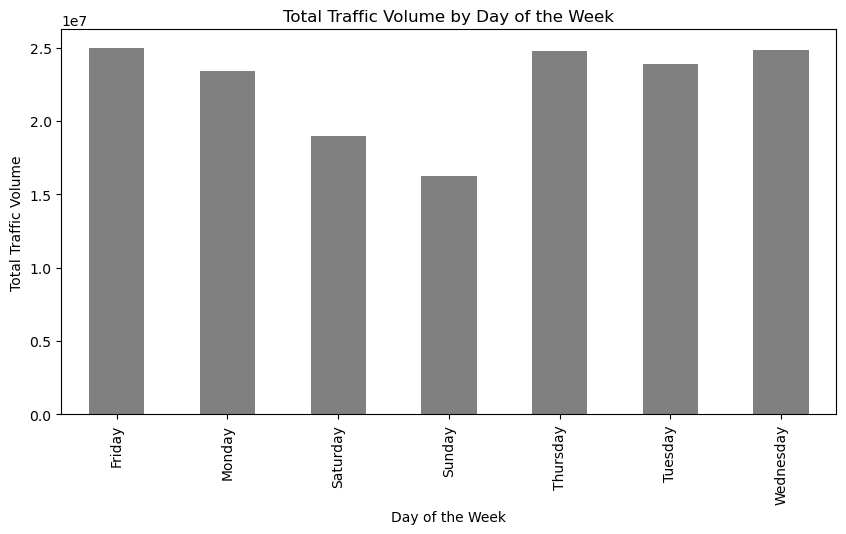

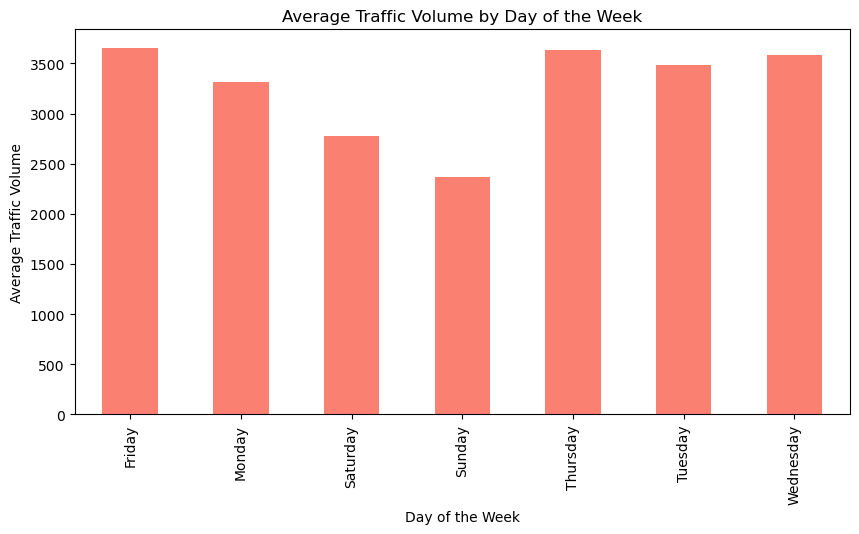

In [21]:
# Plotting total traffic volume per day
plt.figure(figsize=(10, 5))
Days_traffic_total.plot(kind='bar', color='gray')
plt.xlabel('Day of the Week')
plt.ylabel('Total Traffic Volume')
plt.title('Total Traffic Volume by Day of the Week')
plt.show()

# Plotting average traffic volume per day
plt.figure(figsize=(10, 5))
Days_traffic_mean.plot(kind='bar', color='salmon')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Day of the Week')
plt.show()


Friday shows the highest traffic volume, with Wednesday closely following. Overall, traffic volume is significantly higher on weekdays compared to weekends, indicating a likely pattern of increased travel or commuting on working days.

In [22]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,time_of_day,Days
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,Day,Tuesday
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,Day,Tuesday
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,Day,Tuesday
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,Day,Tuesday
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,Day,Tuesday


<br> 
Now let's have a look at ditribution of traffic_volume with the holiday column

In [23]:
df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [24]:
Holiday_traffic_volume = df.groupby('holiday')['traffic_volume'].sum()

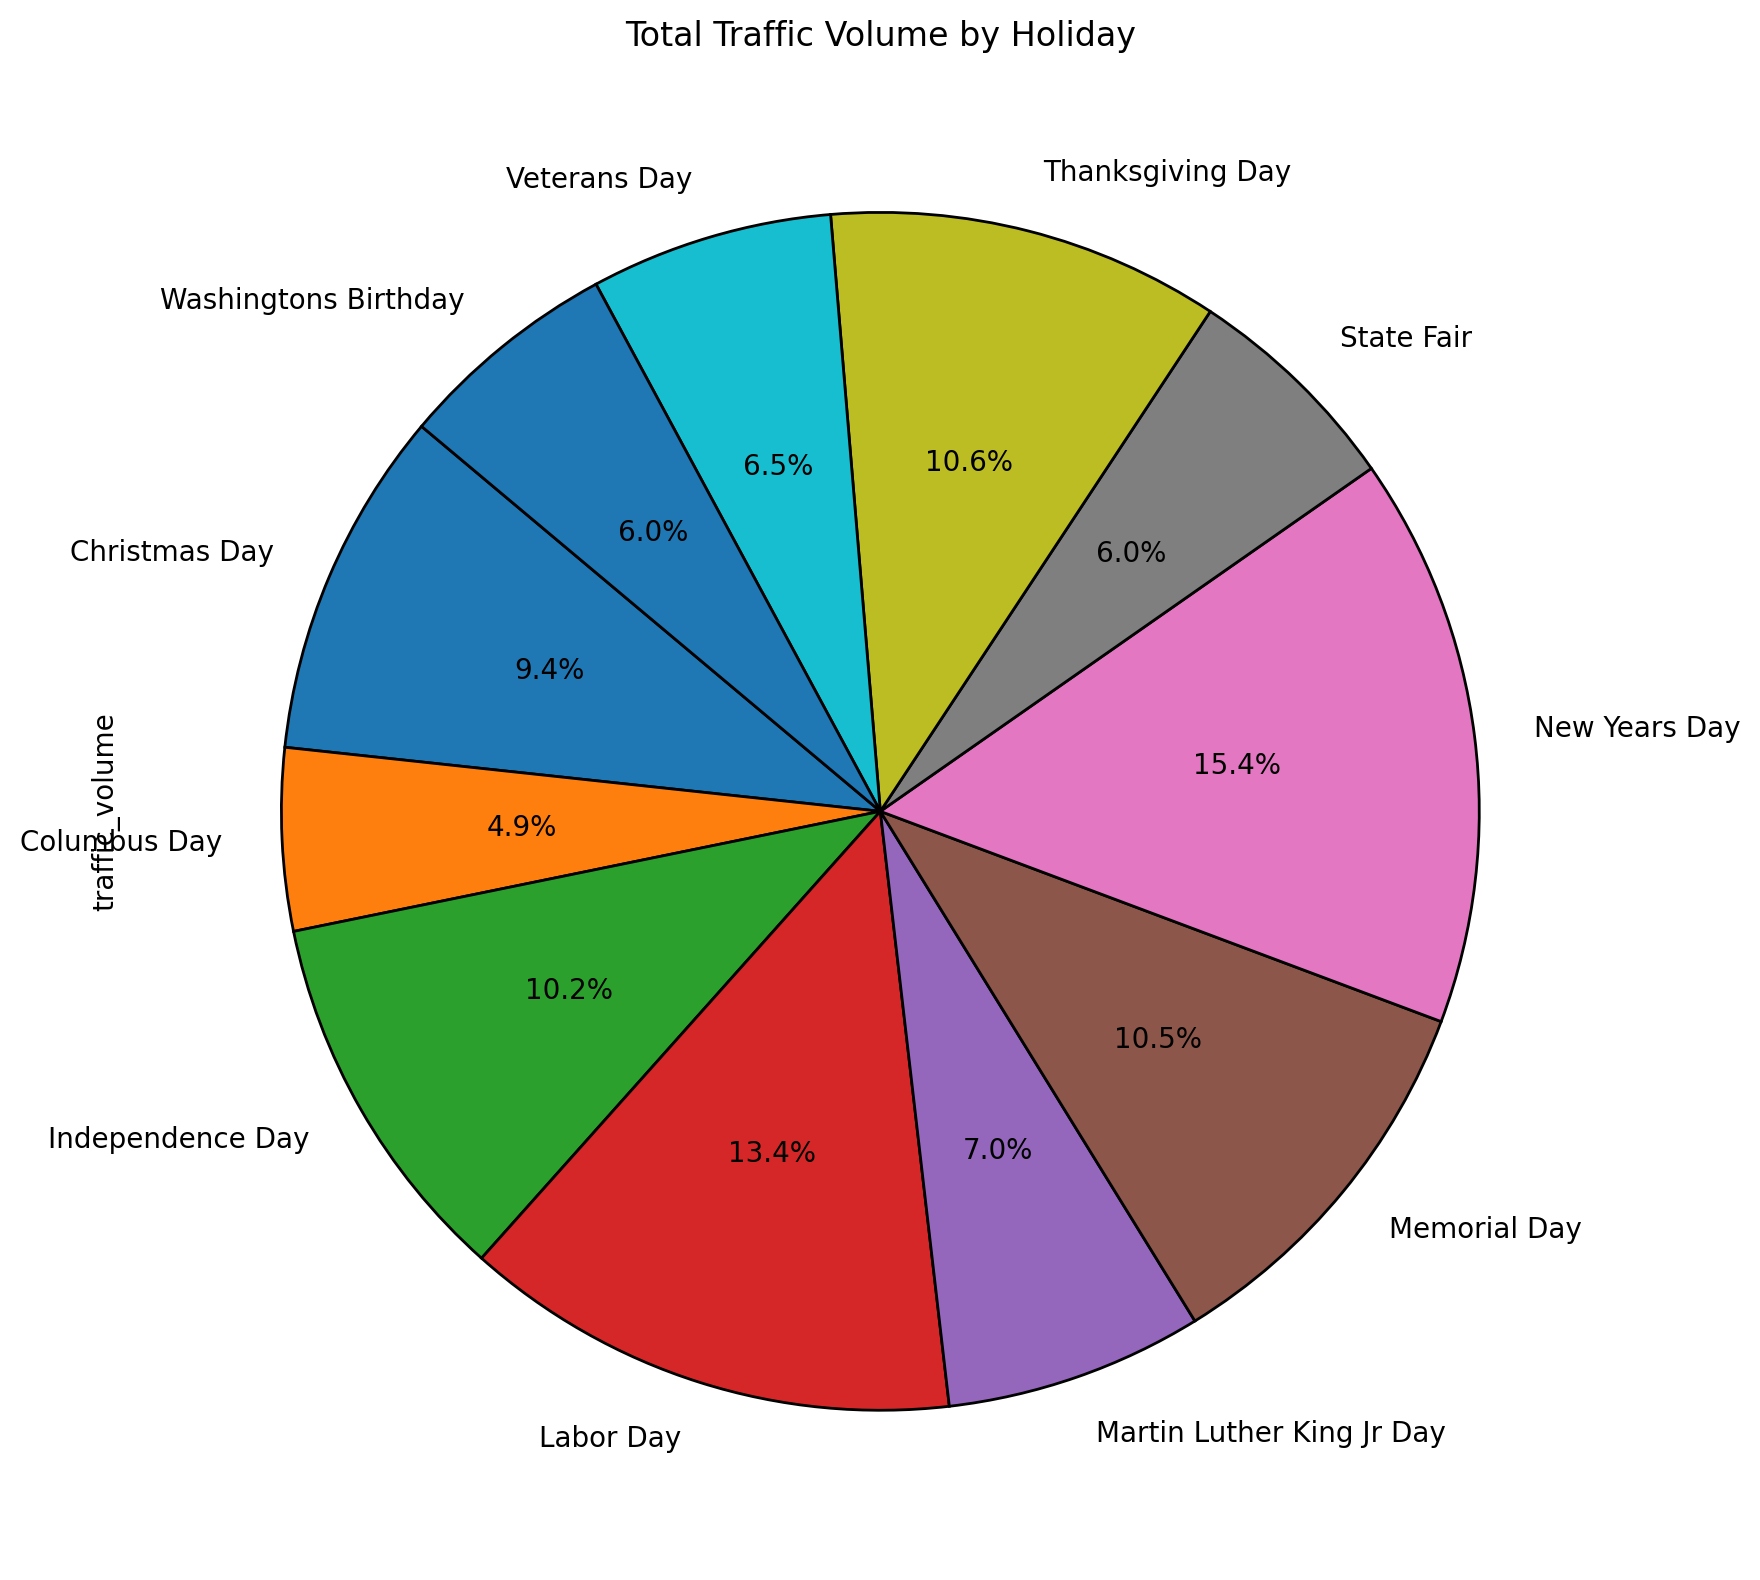

In [25]:
#Let's have a look at each holiday's traffic_volume without days that are not holidays
plt.figure(figsize=(10, 8),dpi = 200)
Holiday_traffic_volume.drop('None').plot(kind='pie',autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Total Traffic Volume by Holiday')
plt.tight_layout()
plt.show()

In [26]:
Holiday_traffic_volume.drop('None').max()

8136

New Year's Day recorded the highest traffic volume among all holidays, with a total of 8,136 over the years 2012 to 2018. This results in an average traffic volume of 1,356 per year, indicating a relatively moderate level of traffic during this holiday

In [27]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,time_of_day,Days
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,Day,Tuesday
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,Day,Tuesday
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,Day,Tuesday
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,Day,Tuesday
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,Day,Tuesday


<br>
Let's have a look at change of traffic volume with temperature. We'll have to first create a column that divides the temperatures into hot or cold for better analysis

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       48204 non-null  int64         
 1   holiday              48204 non-null  object        
 2   temp                 48204 non-null  float64       
 3   rain_1h              48204 non-null  float64       
 4   snow_1h              48204 non-null  float64       
 5   clouds_all           48204 non-null  int64         
 6   weather_main         48204 non-null  object        
 7   weather_description  48204 non-null  object        
 8   date_time            48204 non-null  datetime64[ns]
 9   time_of_day          48204 non-null  object        
 10  Days                 48204 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [29]:
# Creating the new column
df['Temp_state'] = df['temp'].apply(lambda x:'Hot' if x >373 else('cold' if x < 273 else 'Moderate'))

df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,time_of_day,Days,Temp_state
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,Day,Tuesday,Moderate
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,Day,Tuesday,Moderate
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,Day,Tuesday,Moderate
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,Day,Tuesday,Moderate
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,Day,Tuesday,Moderate


In [30]:
df['Temp_state'].unique()

array(['Moderate', 'cold'], dtype=object)

The temperature is not hot in this area , as there is no temperature above 373 which usually signifies a hot temperature
We'll check the traffic_volume in cold temperature period

In [31]:
total_traffic_temperature = df.groupby('Temp_state')['traffic_volume'].sum()
mean_traffic_temperature = df.groupby('Temp_state')['traffic_volume'].mean()

In [32]:
# We'll check the mean traffic_volume in the 'cold' period
mean_traffic_temperature['cold']

2958.3138419369575

In [33]:
# Checking the traffic_volume mean during normal periods
mean_traffic_temperature['Moderate']

3372.734245794126

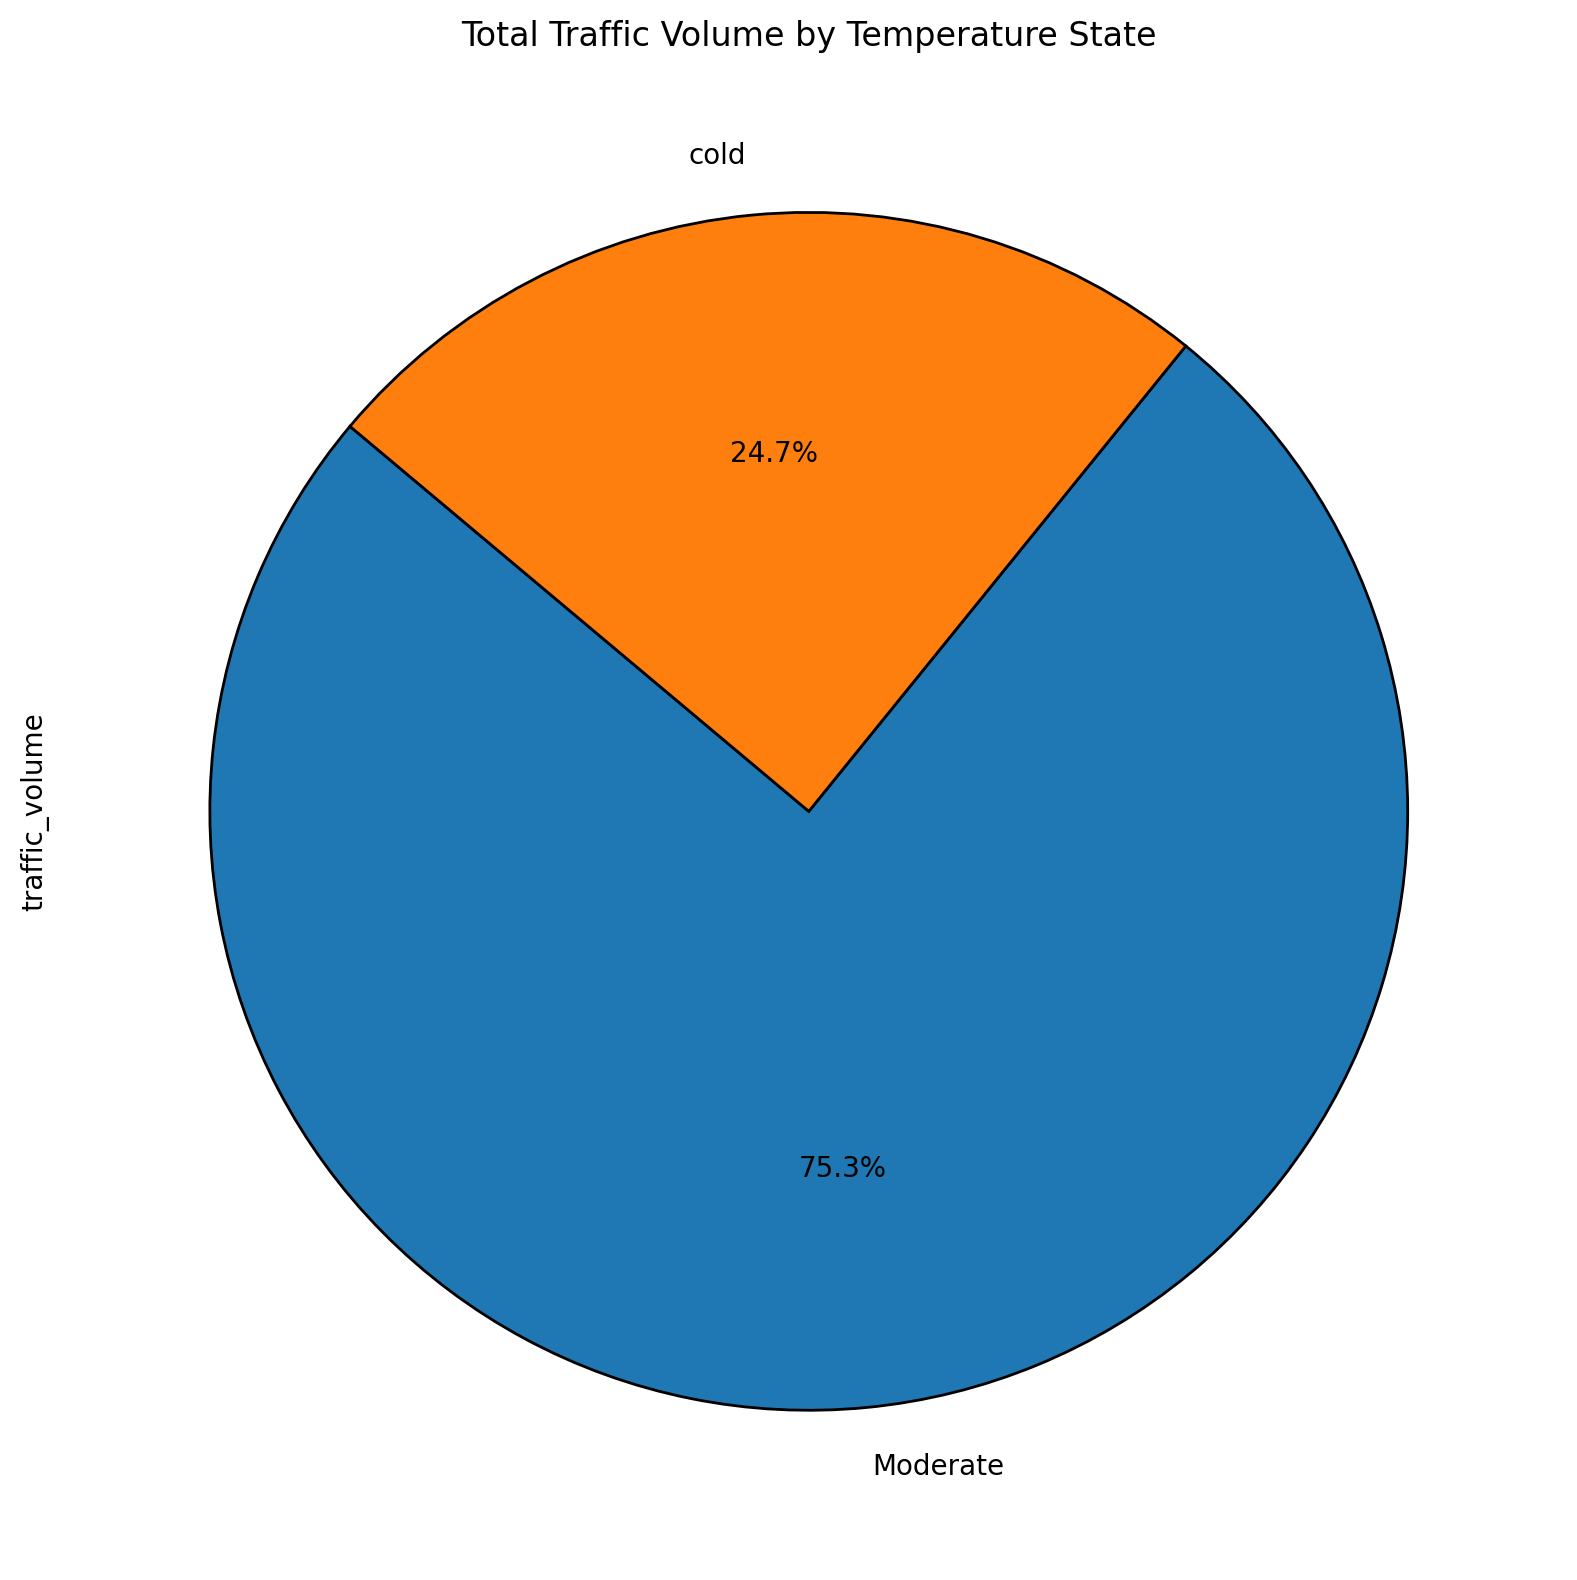

In [34]:
#Let's have a look at traffic_volume distribution by weather period
plt.figure(figsize=(10, 8),dpi = 200)
total_traffic_temperature.plot(kind='pie',autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Total Traffic Volume by Temperature State')
plt.tight_layout()
plt.show()

Since the data is from Minneapolis, extreme cold days are less frequent than moderate days. Interestingly, during colder periods, traffic volume tends to be higher, with an average of 2,960, suggesting that colder weather does not reduce traffic as one might expect.

In [35]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,time_of_day,Days,Temp_state
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,Day,Tuesday,Moderate
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,Day,Tuesday,Moderate
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,Day,Tuesday,Moderate
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,Day,Tuesday,Moderate
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,Day,Tuesday,Moderate


In [36]:
df['snow_1h'].max()

0.51

In [37]:
df['rain_1h'].max()

9831.3

<br>
In this next step I would go ahead and examine if an increase in rainfall or snow correlates with an increase in traffic_volume, as adverse weather can slow down traffic speeds. First, I'll have to divide the traffic volume into categories in a new column to help in conducting this analysis

In [38]:
# Checking traffic_volume stats which would help us in creating the categories

df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [39]:
# No better choice than to use the quartiles
df['traffic_volume_cat'] = df['traffic_volume'].apply(lambda x : 'Low' if x < 1193 else ('High'if x > 4933 else 'Medium'))

df['traffic_volume_cat'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [40]:
traffic_volume_cat = df.groupby('traffic_volume_cat')[['rain_1h','snow_1h']].mean()

In [41]:
traffic_volume_cat

,rain_1h,snow_1h
traffic_volume_cat,,
High,0.923179,0.000355
Low,0.167461,0.000198
Medium,0.123575,0.000168


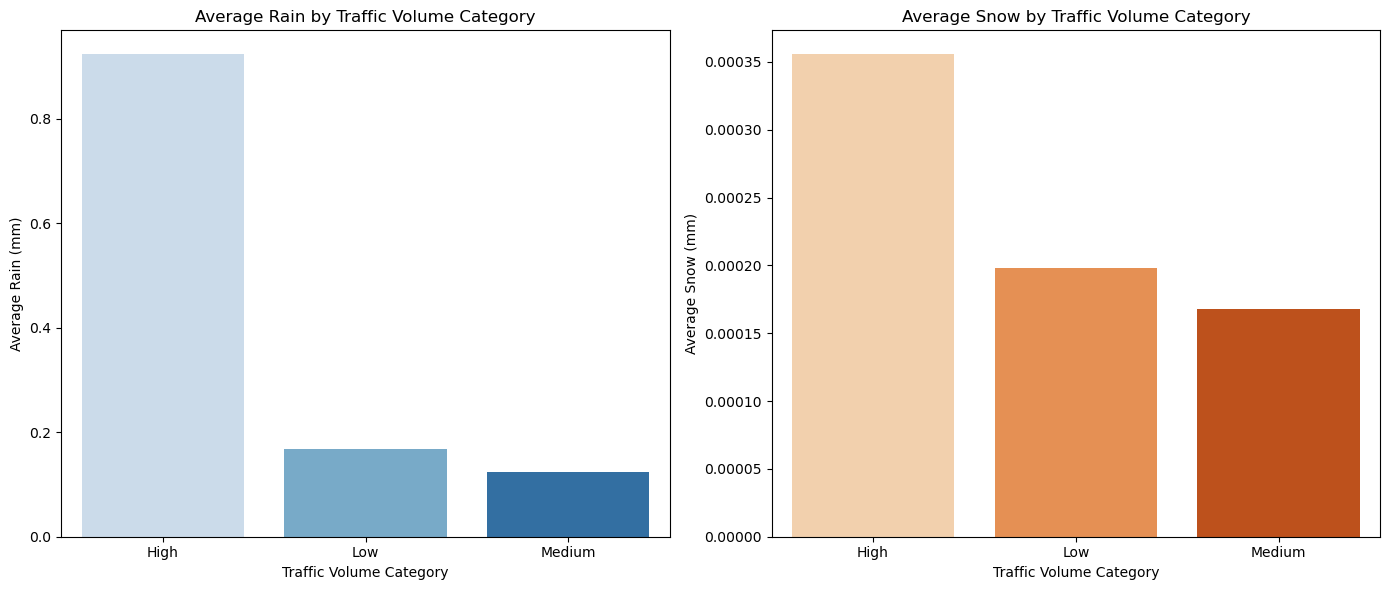

In [42]:
# Reset the index for plotting
traffic_volume_cat = traffic_volume_cat.reset_index()

# Set up the figure for side-by-side bar plots
plt.figure(figsize=(14, 6))

# Plot average rain for each traffic volume category
plt.subplot(1, 2, 1)
sns.barplot(data=traffic_volume_cat, x='traffic_volume_cat', y='rain_1h', palette='Blues')
plt.title('Average Rain by Traffic Volume Category')
plt.xlabel('Traffic Volume Category')
plt.ylabel('Average Rain (mm)')

# Plot average snow for each traffic volume category
plt.subplot(1, 2, 2)
sns.barplot(data=traffic_volume_cat, x='traffic_volume_cat', y='snow_1h', palette='Oranges')
plt.title('Average Snow by Traffic Volume Category')
plt.xlabel('Traffic Volume Category')
plt.ylabel('Average Snow (mm)')

plt.tight_layout()
plt.show()


<br>
The data confirms my hypothesis: adverse weather conditions slow down traffic speeds, resulting in higher traffic volumes during these conditions. This trend is clearly illustrated in the bar plots, where rain and snow levels are higher in high traffic volume categories.

In [43]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,time_of_day,Days,Temp_state,traffic_volume_cat
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,Day,Tuesday,Moderate,High
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,Day,Tuesday,Moderate,Medium
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,Day,Tuesday,Moderate,Medium
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,Day,Tuesday,Moderate,High
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,Day,Tuesday,Moderate,Medium


<br>
Now onto clouds_all column. this column has numeric variables that show the percentage of cloud cover.My Hypothesis on this is that Heavy cloud cover may signal poor visibility conditions, which can possibly affect traffic conditions.
Well time to find out if my hypothesis is right again ha! Is it though?
In this case I will create a new column to categorize cloud cover then  I will use the pandas groupby function to group the data via  cloud cover categories then lastly visualize this using a heatmap this time.

In [44]:
df['cloud_cover_cat'] = df['clouds_all'].apply(lambda x: 'High' if x > 75 else('Clear' if x < 25 else 'Moderate'))

df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,time_of_day,Days,Temp_state,traffic_volume_cat,cloud_cover_cat
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,Day,Tuesday,Moderate,High,Moderate
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,Day,Tuesday,Moderate,Medium,Moderate
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,Day,Tuesday,Moderate,Medium,High
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,Day,Tuesday,Moderate,High,High
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,Day,Tuesday,Moderate,Medium,Moderate


In [45]:
cloud_cover_cat = df.groupby('cloud_cover_cat')['traffic_volume'].mean()

cloud_cover_cat

cloud_cover_cat
Clear       3047.540246
High        3276.736819
Moderate    3567.990442
Name: traffic_volume, dtype: float64

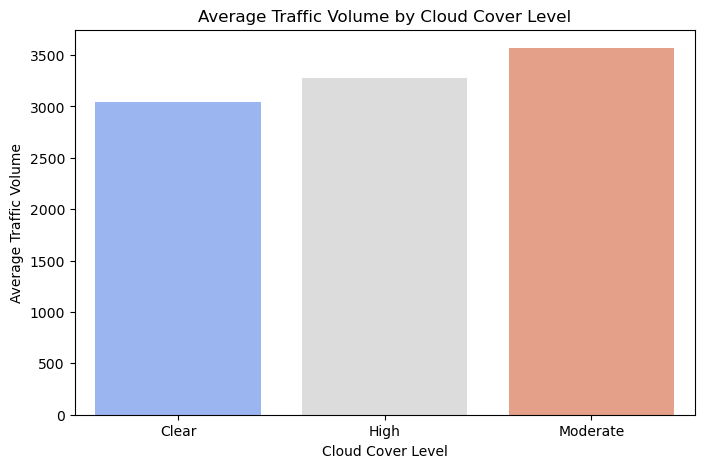

In [46]:
# Plot average traffic volume by cloud cover level
plt.figure(figsize=(8, 5))
sns.barplot(x=cloud_cover_cat.index, y=cloud_cover_cat.values, palette='coolwarm')
plt.title('Average Traffic Volume by Cloud Cover Level')
plt.xlabel('Cloud Cover Level')
plt.ylabel('Average Traffic Volume')
plt.show()


In [47]:
df['cloud_cover_cat'].value_counts()

Clear       18449
High        18037
Moderate    11718
Name: cloud_cover_cat, dtype: int64

Moderate cloud_cover has the highest traffic volume followed by High cloud cover. This visualization approves my hypothesis that cloud cover has an impact on traffic_volume.

In [50]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,time_of_day,Days,Temp_state,traffic_volume_cat,cloud_cover_cat
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,Day,Tuesday,Moderate,High,Moderate
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,Day,Tuesday,Moderate,Medium,Moderate
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,Day,Tuesday,Moderate,Medium,High
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,Day,Tuesday,Moderate,High,High
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,Day,Tuesday,Moderate,Medium,Moderate


In [51]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [52]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

Next we will check the weather_main column where I have a hypothesis that certain weather conditions (like Rain, Snow, Fog, Mist) may impact traffic more than others (Clear or Clouds)

In [53]:
weather_main = df.groupby(['weather_main','weather_description'])['traffic_volume'].mean()
weather_main

weather_main  weather_description                
Clear         Sky is Clear                           3423.148899
              sky is clear                           3001.570510
Clouds        broken clouds                          3661.142092
              few clouds                             3691.453476
              overcast clouds                        3375.963590
              scattered clouds                       3875.622363
Drizzle       drizzle                                3094.858679
              heavy intensity drizzle                3371.109375
              light intensity drizzle                3400.567273
              shower drizzle                         3547.666667
Fog           fog                                    2703.720395
Haze          haze                                   3502.101471
Mist          mist                                   2932.956639
Rain          freezing rain                          4314.000000
              heavy intensity rain      

In [54]:
weather_main = weather_main.reset_index()
weather_main.head()

,weather_main,weather_description,traffic_volume
0,Clear,Sky is Clear,3423.148899
1,Clear,sky is clear,3001.570510
2,Clouds,broken clouds,3661.142092
3,Clouds,few clouds,3691.453476
4,Clouds,overcast clouds,3375.963590


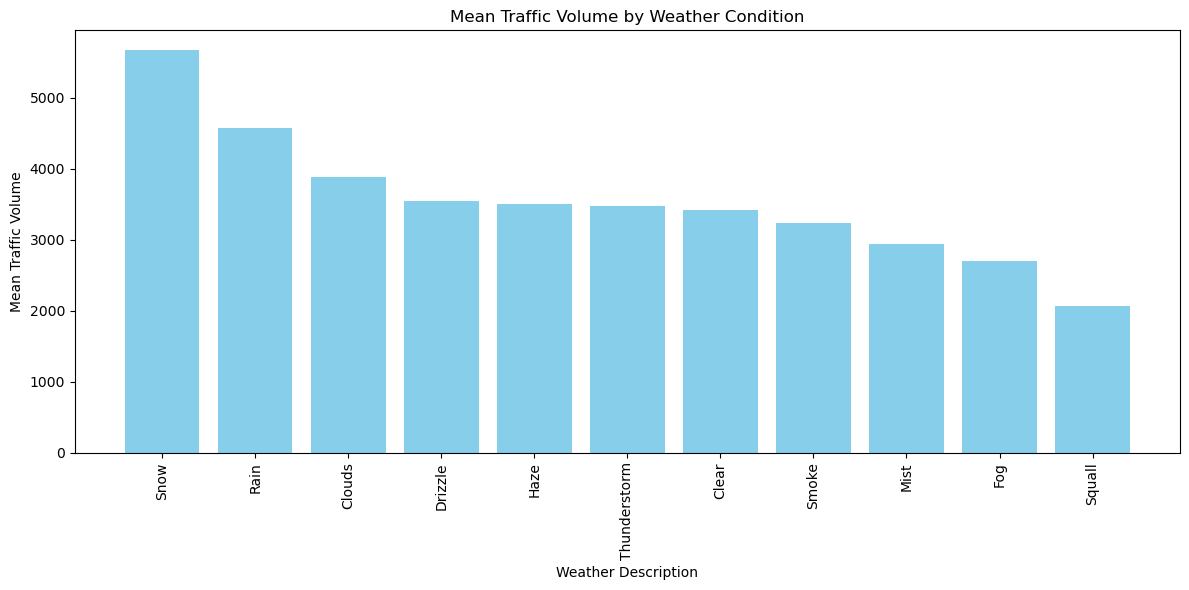

In [55]:
# Reset the index to turn the grouped result into a DataFrame for easy plotting
weather_main_df = weather_main.reset_index()

# Sort the DataFrame by 'traffic_volume' in descending order
weather_main_df = weather_main_df.sort_values(by='traffic_volume', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(
    x=weather_main_df['weather_main'],
    height=weather_main_df['traffic_volume'],
    color='skyblue'
)
plt.xticks(rotation=90)
plt.xlabel('Weather Description')
plt.ylabel('Mean Traffic Volume')
plt.title('Mean Traffic Volume by Weather Condition')
plt.tight_layout()
plt.show()


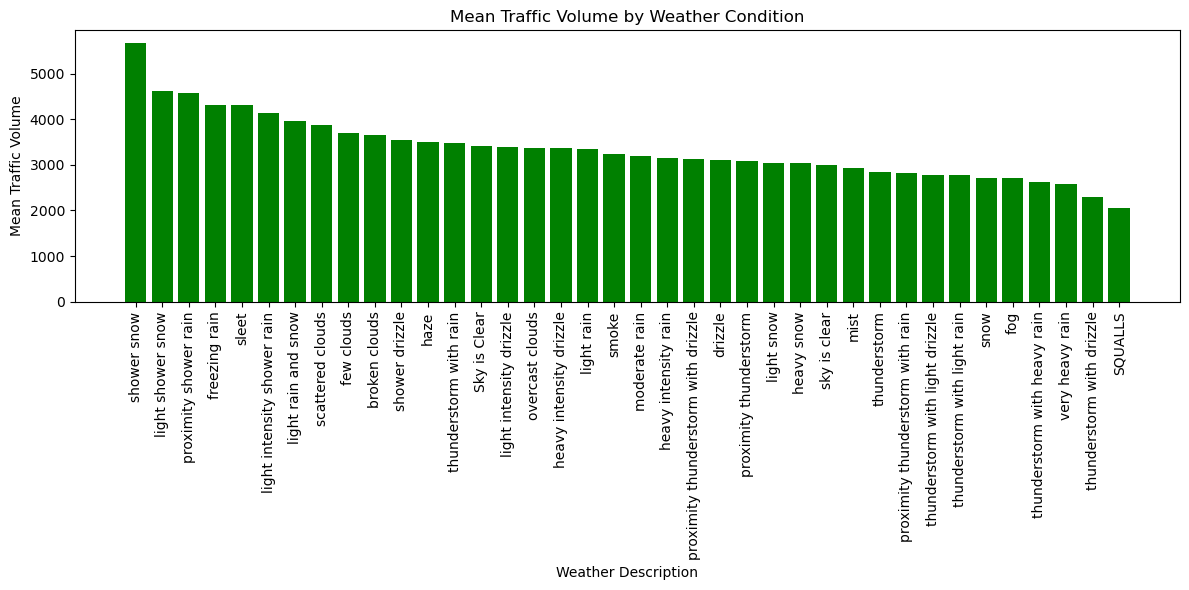

In [56]:
# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(
    x=weather_main_df['weather_description'],
    height=weather_main_df['traffic_volume'],
    color='green'
)
plt.xticks(rotation=90)
plt.xlabel('Weather Description')
plt.ylabel('Mean Traffic Volume')
plt.title('Mean Traffic Volume by Weather Condition')
plt.tight_layout()
plt.show()


The barplots indicate that the highest average traffic volume occurs during snowfall, followed by rainfall, and then cloudy conditions. This supports our analysis that adverse weather conditions, such as snow and rain, significantly impact traffic volume. Additionally, our analysis of cloud cover levels shows a notable effect on traffic volume, with moderate cloud cover associated with the highest average traffic volume among the cloud categories.

# Conclusion

## The analysis of traffic volume on the westbound I-94 reveals several key insights:

**Impact of Adverse Weather:** Snow and rain conditions lead to higher average traffic volumes, indicating that adverse weather correlates with increased traffic congestion. This supports the hypothesis that poor weather conditions slow down travel speeds, causing higher volumes on the highway.

**Cloud Cover Levels:** Moderate cloud cover exhibits the highest average traffic volume, suggesting that cloud cover has a noticeable impact on traffic, with moderate and high levels contributing to increased congestion.

**Time of Day:** Traffic is significantly heavier during the daytime, with greater stability compared to nighttime, which experiences higher fluctuations. This aligns with commuting and regular travel patterns.

**Day of the Week:** Friday and Wednesday show the highest average traffic volumes, and weekdays overall have more traffic than weekends, indicating increased travel likely due to work commutes.

**Holidays:** Among holidays, New Year's Day records a notable average traffic volume, though it's moderate overall, suggesting that while holidays see a decline in traffic, specific ones can vary based on local travel behaviors.

**Temperature and Cold Weather:** Colder days show a surprising trend of higher traffic, suggesting that cold weather alone doesn’t discourage travel in Minneapolis, likely due to the region’s resilience to winter conditions.